# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [22]:
#Libraries
#Libraries
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [24]:
spaceship=spaceship.dropna()
spaceship["Cabin"]=spaceship.loc[:,"Cabin"].str.split("/").str[0]
spaceship=spaceship.drop(columns=["PassengerId","Name"])

## Encode
check = {True: 1, False: 0}
spaceship["Transported"] = spaceship["Transported"].map(check)
spaceship["CryoSleep"] = spaceship["CryoSleep"].map(check)
spaceship["VIP"] = spaceship["VIP"].map(check)

## Dummy variables for non_numerical columns
spaceship=pd.get_dummies(spaceship,columns = ["Cabin","HomePlanet","Destination"])

## We drop one columns to reduce the multicolinearity between the groups of dummy variables
spaceship = spaceship.drop(columns = ["Cabin_A","HomePlanet_Earth","Destination_55 Cancri e"])

## Encoding for new dummies
check = {True: 1, False: 0}

spaceship["Cabin_B"] = spaceship["Cabin_B"].map(check)
spaceship["Cabin_C"] = spaceship["Cabin_C"].map(check)
spaceship["Cabin_D"] = spaceship["Cabin_D"].map(check)
spaceship["Cabin_E"] = spaceship["Cabin_E"].map(check)
spaceship["Cabin_F"] = spaceship["Cabin_F"].map(check)
spaceship["Cabin_G"] = spaceship["Cabin_G"].map(check)
spaceship["Cabin_T"] = spaceship["Cabin_T"].map(check)

spaceship["HomePlanet_Europa"] = spaceship["HomePlanet_Europa"].map(check)
spaceship["HomePlanet_Mars"] = spaceship["HomePlanet_Mars"].map(check)

spaceship["Destination_PSO J318.5-22"] = spaceship["Destination_PSO J318.5-22"].map(check)
spaceship["Destination_TRAPPIST-1e"] = spaceship["Destination_TRAPPIST-1e"].map(check)

## Train Test split
features = spaceship.drop(columns = ["Transported"])
target = spaceship["Transported"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

## Performing normalization and fitting only the Train data to the scalar
scaler = MinMaxScaler()
scaler.fit(X_train)

### Normalization

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns = features.columns)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns = features.columns)


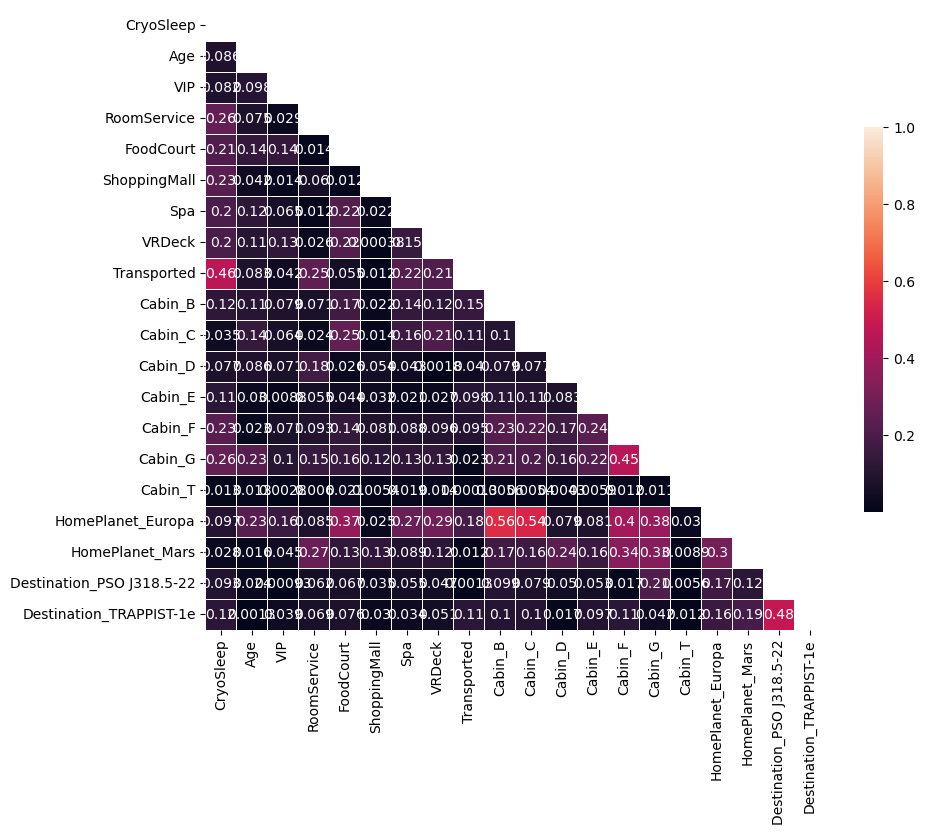

In [25]:
## Feature Selection
### Feature Selection
import matplotlib.pyplot as plt
import seaborn as sns


corr=np.abs(spaceship.corr(method="pearson"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [26]:
X_train_reduced = X_train_norm.drop(columns = ["Destination_PSO J318.5-22", "HomePlanet_Mars", "Cabin_D", "Cabin_E", "Cabin_F", "Cabin_G", "Cabin_T", "Age", "VIP", "FoodCourt", "ShoppingMall"])
X_test_reduced = X_test_norm.drop(columns = ["Destination_PSO J318.5-22", "HomePlanet_Mars", "Cabin_D", "Cabin_E", "Cabin_F", "Cabin_G", "Cabin_T", "Age", "VIP", "FoodCourt", "ShoppingMall"])

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [51]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

bagging_clf.fit(X_train_norm, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

- Evaluate your model

In [52]:
## Bagging Model Performance
pred_bagging = bagging_clf.predict(X_test_norm)
accuracy_score(y_test, pred_bagging)


0.7859304084720121

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [71]:
grid = {"n_estimators": [20, 600, 150,300],
        "estimator__max_leaf_nodes": [100, 500, 1000, None],
        "estimator__max_depth":[20,30,40]}

In [72]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier())

In [96]:
model = GridSearchCV(estimator = bagging_clf, param_grid = grid, cv=5)

- Run Grid Search

In [97]:
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [20, 30, 40],
                         'estimator__max_leaf_nodes': [100, 500, 1000, None],
                         'n_estimators': [20, 600, 150, 300]})

In [101]:
model.best_params_

{'estimator__max_depth': 40,
 'estimator__max_leaf_nodes': 100,
 'n_estimators': 20}

In [102]:
best_model = model.best_estimator_

- Evaluate your model

In [104]:
pred = best_model.predict(X_test_norm)
accuracy_score(y_test, pred)


0.7859304084720121